<a href="https://colab.research.google.com/github/cristiandarioortegayubro/Maestria-Ciencia-de-Datos-UBA-FCE/blob/main/Taller_de_Programacion/TPE1_ORTEGA_YUBRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

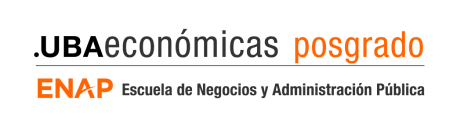

#### Maestría en Métodos Cuantitativos para la Gestión y Análisis de Datos en Organizaciones

#### Taller de Programación - R - **Primera Evaluación**

- Javier GARCIA FRONTI

```
Maestrando: Cristian Darío ORTEGA YUBRO
```


### Efecto día de la semana - Bitcoin - Año 2018

#### Instalando paquetes

In [1]:
install.packages("tidyquant")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
install.packages("Johnson")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



#### Habilitando librerias

In [3]:
library(tidyquant)  

Loading required package: lubridate

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union


Loading required package: PerformanceAnalytics

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend


Loading required package: quantmod

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

══ Need to Learn tidyquant? ════════════════════════════════════════════════════
Business Science offers a 1-hour course - Learning Lab #9: Performance Analysis & Portfolio Optimization with tidyquant!
</> Learn more at: https://

In [4]:
library(Johnson)

In [5]:
library(lmtest)

In [6]:
library(ggplot2)

#### Obtención de la cotización del Bitcoin año 2018

In [7]:
BTC_2018 <- tq_get("BTC-USD", get="stock.prices", from= "2018-01-02", to= "2018-12-31") 

#### Visualización del dataframe

In [8]:
head(BTC_2018)

symbol,date,open,high,low,close,volume,adjusted
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
BTC-USD,2018-01-02,13625.0,15444.6,13163.6,14982.1,16846600192,14982.1
BTC-USD,2018-01-03,14978.2,15572.8,14844.5,15201.0,16871900160,15201.0
BTC-USD,2018-01-04,15270.7,15739.7,14522.2,15599.2,21783199744,15599.2
BTC-USD,2018-01-05,15477.2,17705.2,15202.8,17429.5,23840899072,17429.5
BTC-USD,2018-01-06,17462.1,17712.4,16764.6,17527.0,18314600448,17527.0
BTC-USD,2018-01-07,17527.3,17579.6,16087.7,16477.6,15866000384,16477.6


#### Creando columna con el nombre del día de la semana

In [9]:
BTC_2018$day = wday(BTC_2018$date, label = TRUE)

In [10]:
head(BTC_2018)

symbol,date,open,high,low,close,volume,adjusted,day
<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>
BTC-USD,2018-01-02,13625.0,15444.6,13163.6,14982.1,16846600192,14982.1,Tue
BTC-USD,2018-01-03,14978.2,15572.8,14844.5,15201.0,16871900160,15201.0,Wed
BTC-USD,2018-01-04,15270.7,15739.7,14522.2,15599.2,21783199744,15599.2,Thu
BTC-USD,2018-01-05,15477.2,17705.2,15202.8,17429.5,23840899072,17429.5,Fri
BTC-USD,2018-01-06,17462.1,17712.4,16764.6,17527.0,18314600448,17527.0,Sat
BTC-USD,2018-01-07,17527.3,17579.6,16087.7,16477.6,15866000384,16477.6,Sun


### Modelo 01 Lineal simple, un factor, variable objetivo "close"

In [11]:
summary(BTC_2018)

    symbol               date                 open            high      
 Length:364         Min.   :2018-01-02   Min.   : 3236   Min.   : 3275  
 Class :character   1st Qu.:2018-04-02   1st Qu.: 6385   1st Qu.: 6502  
 Mode  :character   Median :2018-07-02   Median : 6913   Median : 7106  
                    Mean   :2018-07-02   Mean   : 7583   Mean   : 7771  
                    3rd Qu.:2018-10-01   3rd Qu.: 8641   3rd Qu.: 8900  
                    Max.   :2018-12-31   Max.   :17527   Max.   :17712  
                                                                        
      low            close           volume             adjusted      day    
 Min.   : 3191   Min.   : 3237   Min.   :2.924e+09   Min.   : 3237   Sun:52  
 1st Qu.: 6309   1st Qu.: 6384   1st Qu.:4.156e+09   1st Qu.: 6384   Mon:52  
 Median : 6736   Median : 6899   Median :5.072e+09   Median : 6899   Tue:52  
 Mean   : 7335   Mean   : 7556   Mean   :6.052e+09   Mean   : 7556   Wed:52  
 3rd Qu.: 8312   3rd Qu.: 

In [12]:
drop <- c(-1, -3, -4, -5, -7, -8)

In [13]:
BTC_2018 <- BTC_2018[,drop]

In [14]:
summary(BTC_2018)

      date                close        day    
 Min.   :2018-01-02   Min.   : 3237   Sun:52  
 1st Qu.:2018-04-02   1st Qu.: 6384   Mon:52  
 Median :2018-07-02   Median : 6899   Tue:52  
 Mean   :2018-07-02   Mean   : 7556   Wed:52  
 3rd Qu.:2018-10-01   3rd Qu.: 8640   Thu:52  
 Max.   :2018-12-31   Max.   :17527   Fri:52  
                                      Sat:52  

In [15]:
attach(BTC_2018)

In [16]:
day = factor(day)

In [17]:
Modelo_01_BTC_2018 = lm(close~day-1)

In [18]:
summary(Modelo_01_BTC_2018)


Call:
lm(formula = close ~ day - 1)

Residuals:
    Min      1Q  Median      3Q     Max 
-4371.3 -1167.6  -648.6  1081.5  9918.9 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)    
daySun   7543.7      340.9   22.13   <2e-16 ***
dayMon   7484.7      340.9   21.96   <2e-16 ***
dayTue   7627.1      340.9   22.38   <2e-16 ***
dayWed   7549.9      340.9   22.15   <2e-16 ***
dayThu   7522.3      340.9   22.07   <2e-16 ***
dayFri   7553.2      340.9   22.16   <2e-16 ***
daySat   7608.1      340.9   22.32   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2458 on 357 degrees of freedom
Multiple R-squared:  0.906,	Adjusted R-squared:  0.9041 
F-statistic: 491.4 on 7 and 357 DF,  p-value: < 2.2e-16


#### Analisis de los supuestos del Modelo 01

##### Normalidad

La hipotesis nula (H0) es que los datos de los residuos son normales, el rechazo de la hipótesis nula (H1) sugiere la presencia de una desviación de la distribución, respecto de la normal.


In [19]:
shapiro.test(rstandard(Modelo_01_BTC_2018))


	Shapiro-Wilk normality test

data:  rstandard(Modelo_01_BTC_2018)
W = 0.90941, p-value = 5.855e-14


In [20]:
shapiro.test(residuals(Modelo_01_BTC_2018))


	Shapiro-Wilk normality test

data:  residuals(Modelo_01_BTC_2018)
W = 0.90941, p-value = 5.855e-14


##### Homocedasticidad

La igualdad de las varianzas de la variable close por día de la semana se puede probar con el test de Breusch - Pagan.

In [21]:
bptest(Modelo_01_BTC_2018)


	studentized Breusch-Pagan test

data:  Modelo_01_BTC_2018
BP = 0.50108, df = 6, p-value = 0.9978


##### Independencia

Otro de los supuestos planteados para los errores del modelo es el de independencia estotástica o probabilística. Debido a la forma de los datos, esta independencia parece difícil de asumir debido a que dos filas consecutivas significan dos días consecutivos para el precio de un Bitcoin

In [22]:
dwtest(Modelo_01_BTC_2018)


	Durbin-Watson test

data:  Modelo_01_BTC_2018
DW = 0.024702, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


#### Algunos graficos del Modelo 01

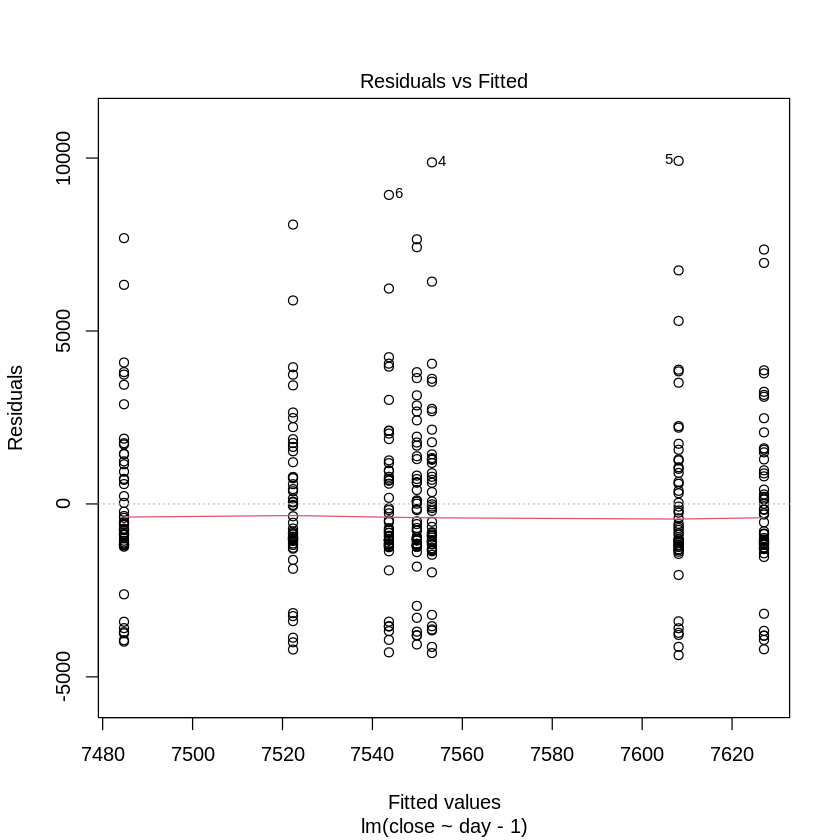

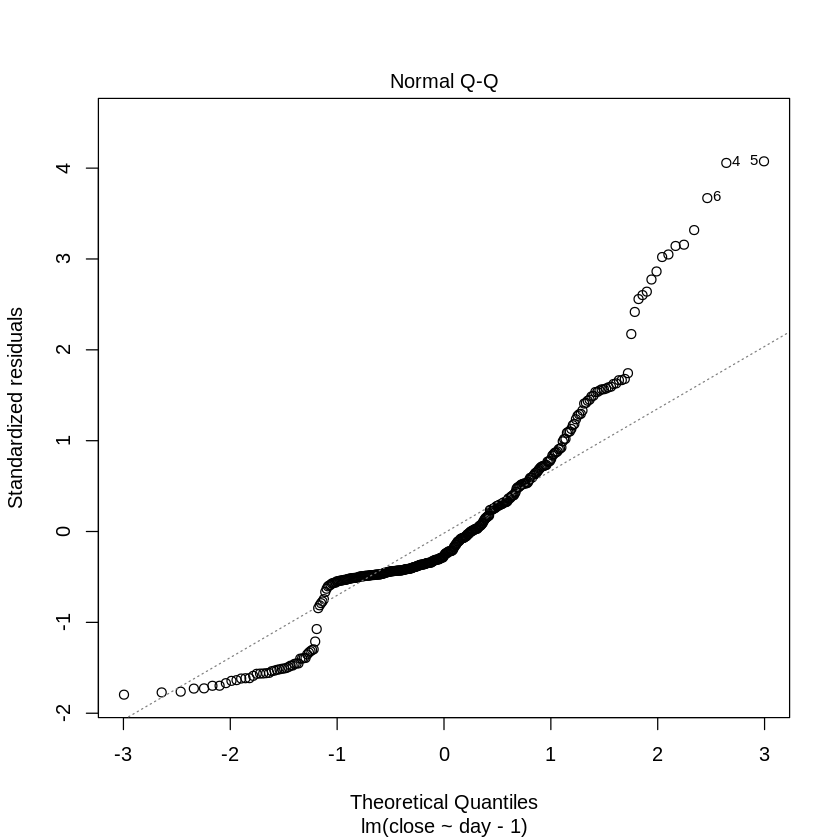

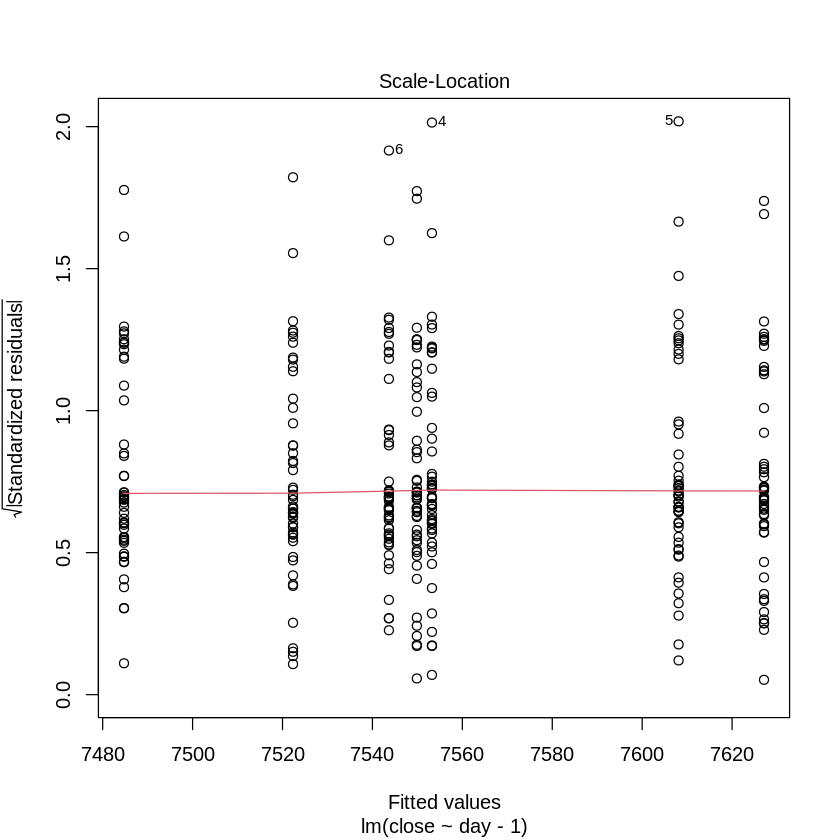

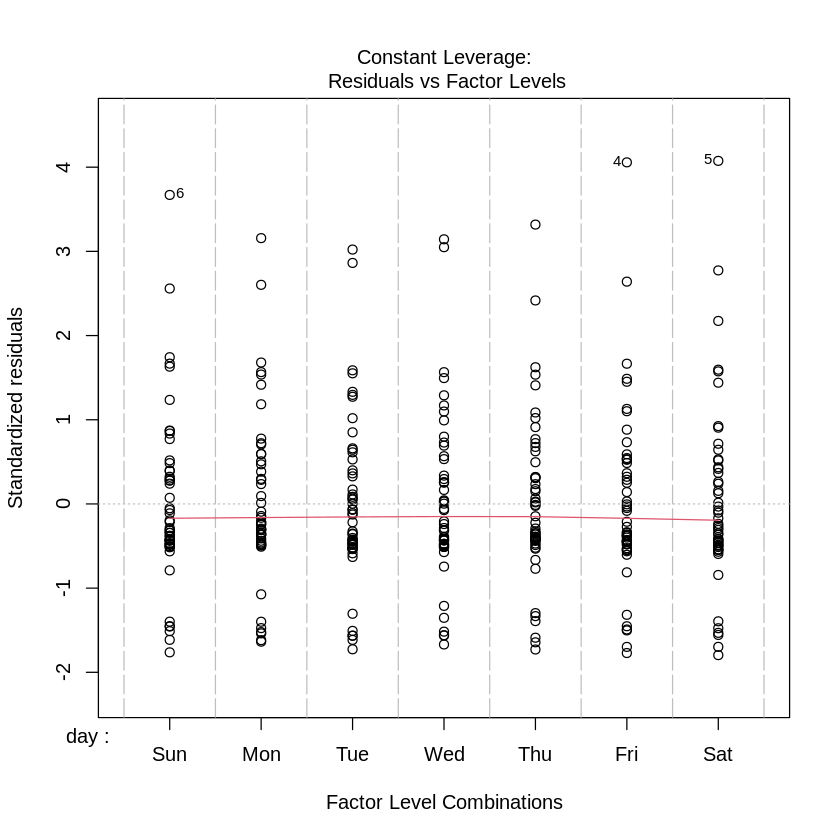

In [23]:
plot(Modelo_01_BTC_2018)

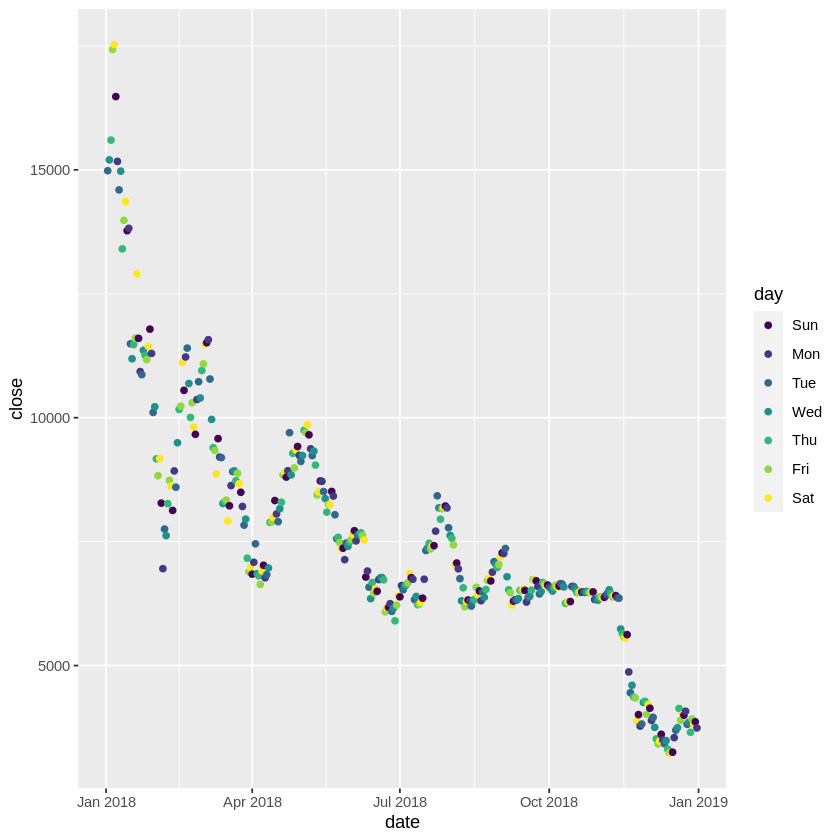

In [24]:
ggplot(Modelo_01_BTC_2018, aes(x = date, y = close, colour = day)) + geom_point()

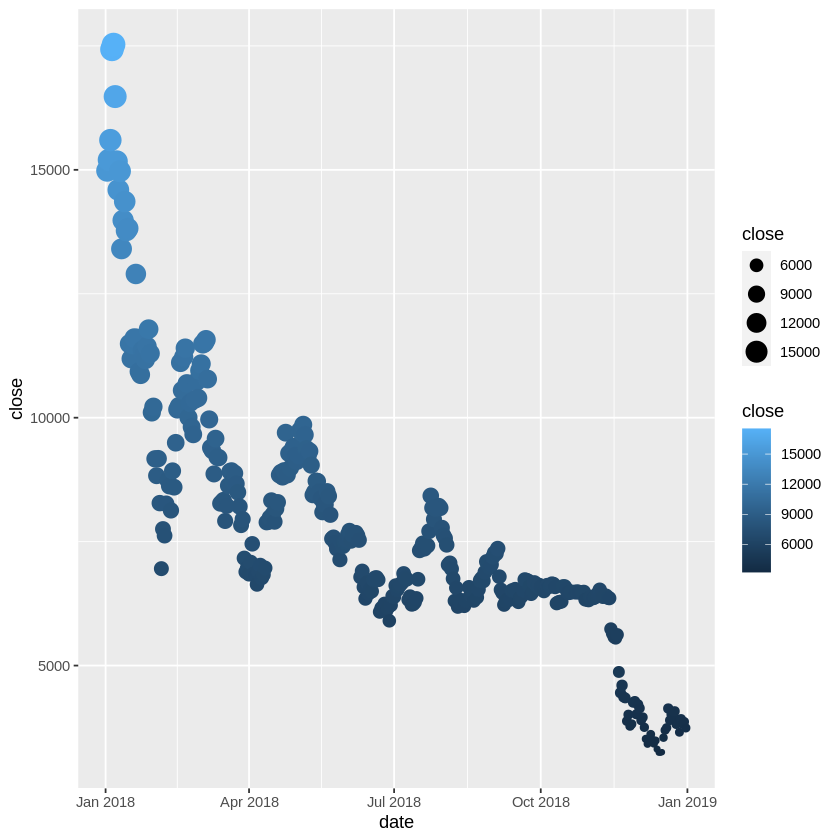

In [25]:
ggplot(Modelo_01_BTC_2018, aes(x = date, y = close, colour = close, size = close)) + geom_point()

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



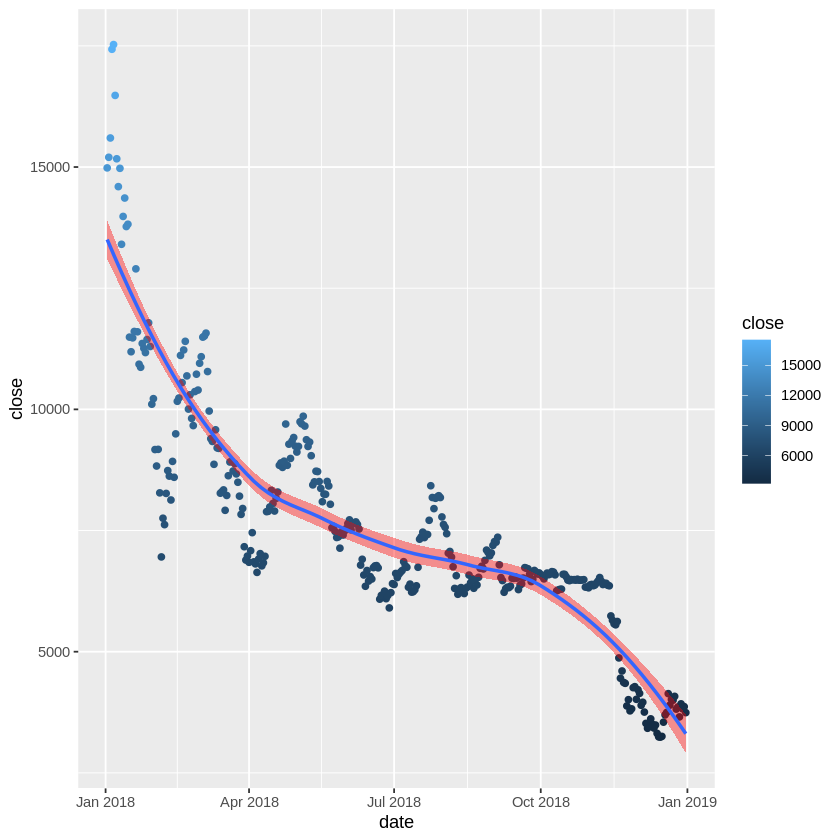

In [26]:
ggplot(Modelo_01_BTC_2018, aes(x = date, y = close, colour = close)) + geom_point() +
geom_smooth(fill = "red")

### Modelo 02 Lineal simple, un factor, variable objetivo "diff" - Diferencia de cotización entre días

In [27]:
BTC2_2018 <- tq_get("BTC-USD", get="stock.prices", from= "2018-01-02", to= "2018-12-31") # 364 OBSERVACIONES

In [28]:
BTC3_2018 <- tq_get("BTC-USD", get="stock.prices", from= "2018-01-01", to= "2018-12-31") # 365 OBSERVACIONES

In [29]:
diff = diff(BTC3_2018$close) # 364 OBSERVACIONES

In [30]:
BTC2_2018$day = wday(BTC2_2018$date, label = TRUE)

In [31]:
BTC2_2018 <- BTC2_2018[,drop]

In [32]:
BTC2_2018$diff = diff

In [33]:
summary(BTC2_2018)

      date                close        day          diff          
 Min.   :2018-01-02   Min.   : 3237   Sun:52   Min.   :-2329.300  
 1st Qu.:2018-04-02   1st Qu.: 6384   Mon:52   1st Qu.: -155.515  
 Median :2018-07-02   Median : 6899   Tue:52   Median :    5.285  
 Mean   :2018-07-02   Mean   : 7556   Wed:52   Mean   :  -27.238  
 3rd Qu.:2018-10-01   3rd Qu.: 8640   Thu:52   3rd Qu.:  115.327  
 Max.   :2018-12-31   Max.   :17527   Fri:52   Max.   : 1830.300  
                                      Sat:52                      

In [34]:
BTC2_2018 = BTC2_2018[,-2]

In [35]:
summary(BTC2_2018)

      date             day          diff          
 Min.   :2018-01-02   Sun:52   Min.   :-2329.300  
 1st Qu.:2018-04-02   Mon:52   1st Qu.: -155.515  
 Median :2018-07-02   Tue:52   Median :    5.285  
 Mean   :2018-07-02   Wed:52   Mean   :  -27.238  
 3rd Qu.:2018-10-01   Thu:52   3rd Qu.:  115.327  
 Max.   :2018-12-31   Fri:52   Max.   : 1830.300  
                      Sat:52                      

In [36]:
attach(BTC2_2018)

The following objects are masked _by_ .GlobalEnv:

    day, diff


The following objects are masked from BTC_2018:

    date, day




In [37]:
day = factor(day)

In [38]:
Modelo_02_BTC2018 = lm(diff~day-1)

In [39]:
summary(Modelo_02_BTC2018)


Call:
lm(formula = diff ~ day - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2280.99  -138.42    27.45   142.88  1799.40 

Coefficients:
       Estimate Std. Error t value Pr(>|t|)
daySun   -64.44      53.32  -1.208    0.228
dayMon   -58.92      53.32  -1.105    0.270
dayTue   -48.31      53.32  -0.906    0.366
dayWed   -77.22      53.32  -1.448    0.148
dayThu   -27.54      53.32  -0.517    0.606
dayFri    30.90      53.32   0.579    0.563
daySat    54.87      53.32   1.029    0.304

Residual standard error: 384.5 on 357 degrees of freedom
Multiple R-squared:  0.01993,	Adjusted R-squared:  0.0007142 
F-statistic: 1.037 on 7 and 357 DF,  p-value: 0.4046


#### Analisis de los supuestos del Modelo 02

##### Normalidad

La hipotesis nula (H0) es que los datos de los residuos son normales, el rechazo de la hipótesis nula (H1) sugiere la presencia de una desviación de la distribución, respecto de la normal.


In [40]:
shapiro.test(rstandard(Modelo_02_BTC2018))


	Shapiro-Wilk normality test

data:  rstandard(Modelo_02_BTC2018)
W = 0.89433, p-value = 3.492e-15


In [41]:
shapiro.test(residuals(Modelo_02_BTC2018))


	Shapiro-Wilk normality test

data:  residuals(Modelo_02_BTC2018)
W = 0.89433, p-value = 3.492e-15


##### Homocedasticidad

La igualdad de las varianzas de la variable close por día de la semana se puede probar con el test de Breusch - Pagan.

In [42]:
bptest(Modelo_02_BTC2018)


	studentized Breusch-Pagan test

data:  Modelo_02_BTC2018
BP = 5.7357, df = 6, p-value = 0.4534


##### Independencia

In [43]:
dwtest(Modelo_02_BTC2018)


	Durbin-Watson test

data:  Modelo_02_BTC2018
DW = 1.9516, p-value = 0.3423
alternative hypothesis: true autocorrelation is greater than 0


Al haber logrado el supuesto de independencia, entonces sobre la variable objetivo se podría normalizar

### Modelo 03 Lineal simple, un factor, variable objetivo "diff" - Transformación Johnson

In [44]:
Z <- RE.Johnson(BTC2_2018$diff)

In [45]:
diffNormal<- Z$transformed

In [46]:
Modelo_03_BTC2018 = lm(diffNormal~day-1)

In [47]:
summary(Modelo_03_BTC2018)


Call:
lm(formula = diffNormal ~ day - 1)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.39599 -0.73604  0.02042  0.67384  2.41189 

Coefficients:
        Estimate Std. Error t value Pr(>|t|)  
daySun -0.009086   0.136695  -0.066   0.9470  
dayMon -0.070750   0.136695  -0.518   0.6051  
dayTue -0.026243   0.136695  -0.192   0.8479  
dayWed -0.090285   0.136695  -0.660   0.5094  
dayThu  0.038540   0.136695   0.282   0.7781  
dayFri  0.098512   0.136695   0.721   0.4716  
daySat  0.256093   0.136695   1.873   0.0618 .
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9857 on 357 degrees of freedom
Multiple R-squared:  0.01341,	Adjusted R-squared:  -0.00593 
F-statistic: 0.6935 on 7 and 357 DF,  p-value: 0.6776


#### Analisis de los supuestos del Modelo 03

##### Normalidad

In [48]:
shapiro.test(rstandard(Modelo_03_BTC2018))


	Shapiro-Wilk normality test

data:  rstandard(Modelo_03_BTC2018)
W = 0.99257, p-value = 0.06728


In [49]:
shapiro.test(residuals(Modelo_03_BTC2018))


	Shapiro-Wilk normality test

data:  residuals(Modelo_03_BTC2018)
W = 0.99257, p-value = 0.06728


##### Homocedasticidad

In [50]:
bptest(Modelo_03_BTC2018)


	studentized Breusch-Pagan test

data:  Modelo_03_BTC2018
BP = 9.4889, df = 6, p-value = 0.1479


##### Independencia

In [51]:
dwtest(Modelo_03_BTC2018)


	Durbin-Watson test

data:  Modelo_03_BTC2018
DW = 2.0493, p-value = 0.6983
alternative hypothesis: true autocorrelation is greater than 0
